In [114]:
import numpy as np
from PIL import Image

In [115]:
# --- 1. 定义图像参数 ---
# 定义我们想要的图像尺寸
height = 400
width = 400

In [116]:
# --- 2. 创建四通道 NumPy 数组 ---
# 创建一个形状为 (height, width, 4) 的 3D 数组
# 数组中的每个值都是 0 到 255 之间的无符号8位整数 (uint8)
# 这是图像的标准数据类型
# 4 个通道分别代表 R, G, B, A
rgba_array = np.zeros((height, width, 4), dtype=np.uint8)

In [117]:
# --- 3. 填充数组数据 (生成图像内容) ---
# 我们可以遍历每个像素，但使用 NumPy 的广播功能更高效

# 示例：创建一个复杂的渐变
# 创建一个从 0 到 255 的水平（宽度）渐变
x_gradient = np.linspace(0, 255, width, dtype=np.uint8)
# 创建一个从 0 到 255 的垂直（高度）渐变
y_gradient = np.linspace(0, 255, height, dtype=np.uint8)

In [118]:
# 通道 0 (Red): 填充水平渐变
# np.tile 会将 x_gradient 复制 'height' 次，以填充所有行
rgba_array[:, :, 0] = np.tile(x_gradient, (height, 1))
# 通道 1 (Green): 填充垂直渐变
# 我们需要将 y_gradient 变形为 (height, 1) 才能正确广播
rgba_array[:, :, 1] = np.tile(y_gradient[:, None], (1, width))
# 通道 2 (Blue): 设为一个恒定值，例如 128
rgba_array[:, :, 2] = 128

In [119]:
# 通道 3 (Alpha/透明度): 创建一个从左到右和从上到下的对角线渐变
# 255 = 完全不透明, 0 = 完全透明

# 1. 创建一个从 255 到 0 的水平（宽度）渐变
#    我们使用 uint16 来防止计算时溢出
alpha_x_gradient = np.linspace(255, 0, width, dtype=np.uint16)

# 2. 创建一个从 255 到 0 的垂直（高度）渐变
alpha_y_gradient = np.linspace(255, 0, height, dtype=np.uint16)

# 3. 将两个渐变广播（tile）到完整的 2D 形状
alpha_x_2d = np.tile(alpha_x_gradient, (height, 1))
alpha_y_2d = np.tile(alpha_y_gradient[:, np.newaxis], (1, width))

# 4. 将两个 2D 数组相加并除以 2 来取平均值
#    (alpha_x + alpha_y) / 2
#    这样，左上角是 (255+255)/2 = 255 (不透明)
#    右下角是 (0+0)/2 = 0 (透明)
#    右上角是 (0+255)/2 ≈ 127 (半透明)
#    左下角是 (255+0)/2 ≈ 127 (半透明)
combined_alpha = (alpha_x_2d + alpha_y_2d) / 2
combined_alpha

array([[255. , 254.5, 254. , ..., 128. , 127.5, 127.5],
       [254.5, 254. , 253.5, ..., 127.5, 127. , 127. ],
       [254. , 253.5, 253. , ..., 127. , 126.5, 126.5],
       ...,
       [128. , 127.5, 127. , ...,   1. ,   0.5,   0.5],
       [127.5, 127. , 126.5, ...,   0.5,   0. ,   0. ],
       [127.5, 127. , 126.5, ...,   0.5,   0. ,   0. ]], shape=(400, 400))

In [120]:
# 5. 将最终结果转换回 uint8 并分配给 alpha 通道
rgba_array[:, :, 3] = combined_alpha.astype(np.uint8)

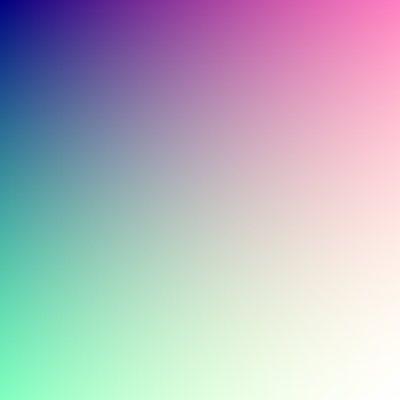

In [121]:
# --- 4. 从 NumPy 数组创建图像 ---
# 使用 Pillow 的 Image.fromarray() 方法
image = Image.fromarray(rgba_array)
image

In [122]:
# --- 5. 保存图像 ---
# 我们必须将图像保存为支持 Alpha 通道的格式，例如 PNG
# 像 JPEG (.jpg) 这样的格式不支持透明度
file_path = "generated_rgba_image1.png"
image.save(file_path)

In [123]:
mosaic_array = np.zeros((height, width))
mosaic_array[::2, ::2] = 255

In [124]:
rgba_array[:, :, 0] = mosaic_array
rgba_array[:, :, 1] = mosaic_array
rgba_array[:, :, 2] = mosaic_array

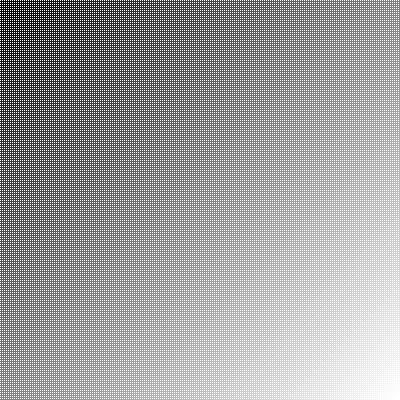

In [125]:
image = Image.fromarray(rgba_array)
image

In [126]:
file_path = "generated_rgba_image2.png"
image.save(file_path)